In [1]:
#!pip install pyparsing matplotlib numpy pandas

In [2]:
# read pickle file
# get current working directory
import os
os.getcwd()
import pickle
import pandas as pd
import polars as pl

In [3]:
with open("data/pickle/salary_guide_2023.pkl", 'rb') as f:
    data = pickle.load(f)

# load to dataframe
df_2023 = pd.DataFrame(data)
df_2023.head()

,province,region,job,entry,mid,senior
0,,calgary metropolitan region,administrative assistant,43.6-56.4,49.9-61.3,55.2-66.7
1,,calgary metropolitan region,administrative manager,65.2-74.3,71.1-81.9,78.7-94.6
2,,calgary metropolitan region,buyer assistant,45.5-57.2,53.4-66.1,58.8-72.2
3,,calgary metropolitan region,claims supervisor,70.1-82.0,78.5-104.9,89.0-119.7
4,,calgary metropolitan region,contracts administrator,80.4-98.8,87.7-109.3,91.2-120.5


In [4]:
with open("data/pickle/salary_guide_2024_1.pkl", 'rb') as f:
    data = pickle.load(f)

# load to dataframe
df_2024 = pd.DataFrame(data)
df_2024.head()

,province,region,job,entry,mid,senior
0,alberta,,agent·e d’assistance voyage bilingue,"47,7-68,2","53,5-68,2","59,7-75,7"
1,alberta,,agent·e de clavardage bilingue,"52,6-75,8","58,5-75,8","65,7-85,2"
2,alberta,,agent·e de prise de commande bilingue,"40,8-59,7","47,0-59,7","52,9-66,1"
3,alberta,,agent·e de rétention de la clientèle bilingue,"42,4-65,2","49,0-65,2","56,0-74,3"
4,alberta,,agent·e de sondage bilingue,"38,5-60,1","46,6-60,1","53,3-65,9"


## 1.1
### 2023 Data Cleaning

In [5]:
# Split the salary ranges into minimum and maximum salaries
df_2023[['entry_min', 'entry_max']] = df_2023['entry'].str.split('-', expand=True).astype(float)
df_2023[['mid_min', 'mid_max']] = df_2023['mid'].str.split('-', expand=True).astype(float)
df_2023[['senior_min', 'senior_max']] = df_2023['senior'].str.split('-', expand=True).astype(float)

# Create a new column with the maximum salary for each job
df_2023['max_salary'] = df_2023[['entry_max', 'mid_max', 'senior_max']].max(axis=1)
#calculate the mean for each level
df_2023['entry_mean'] = df_2023[['entry_min', 'entry_max']].mean(axis=1)
df_2023['mid_mean'] = df_2023[['mid_min', 'mid_max']].mean(axis=1)
df_2023['senior_mean'] = df_2023[['senior_min', 'senior_max']].mean(axis=1)

# Sort the DataFrame by the maximum salary in descending order
df_sorted_2023 = df_2023.sort_values('max_salary', ascending=False)

In [6]:
describe_2023 = df_sorted_2023.describe()
describe_2023

,entry_min,entry_max,mid_min,mid_max,senior_min,senior_max,max_salary,entry_mean,mid_mean,senior_mean
count,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000,18592.000000
mean,60.724174,79.490620,69.996117,93.084015,80.851081,107.323117,107.323833,70.107397,81.540066,94.087099
std,22.597699,32.012493,28.945621,41.770752,36.412084,53.251930,53.251400,27.195368,35.229663,44.625122
min,0.000000,17.000000,14.000000,19.000000,15.000000,19.000000,19.000000,15.000000,16.500000,18.000000
25%,47.300000,61.000000,53.500000,69.800000,60.400000,79.200000,79.200000,54.200000,61.650000,69.850000
50%,58.300000,75.900000,66.300000,87.600000,75.800000,99.950000,99.950000,67.150000,77.000000,87.950000
75%,72.600000,95.900000,82.400000,111.000000,94.400000,126.600000,126.600000,84.150000,96.850000,110.650000
max,172.600000,296.800000,250.700000,430.100000,346.300000,713.000000,713.000000,234.700000,340.400000,470.200000


## 1.2
### 2024 Data Cleaning

In [7]:
# Split the salary ranges into minimum and maximum salaries
df_2024[['entry_min', 'entry_max']] = df_2024['entry'].str.replace(',', '.').str.split('-', expand=True).astype(float)
df_2024[['mid_min', 'mid_max']] = df_2024['mid'].str.replace(',', '.').str.split('-', expand=True).astype(float)
df_2024[['senior_min', 'senior_max']] = df_2024['senior'].str.replace(',', '.').str.split('-', expand=True).astype(float)

# Create a new column with the maximum salary for each job
df_2024['max_salary'] = df_2024[['entry_max', 'mid_max', 'senior_max']].max(axis=1)
#calculate the mean for each level
df_2024['entry_mean'] = df_2024[['entry_min', 'entry_max']].mean(axis=1)
df_2024['mid_mean'] = df_2024[['mid_min', 'mid_max']].mean(axis=1)
df_2024['senior_mean'] = df_2024[['senior_min', 'senior_max']].mean(axis=1)

# Sort the DataFrame by the maximum salary in descending order
df_sorted_2024 = df_2024.sort_values('max_salary', ascending=False)

In [8]:
describe_2024 = df_sorted_2024.describe()
describe_2024

,entry_min,entry_max,mid_min,mid_max,senior_min,senior_max,max_salary,entry_mean,mid_mean,senior_mean
count,15508.000000,15508.000000,15508.000000,15508.000000,15508.000000,15508.000000,15508.000000,15508.000000,15508.000000,15508.000000
mean,62.427940,94.672479,71.765547,94.672479,82.815224,109.073846,109.113780,78.550210,83.219013,95.944535
std,23.235598,41.975598,29.379357,41.975598,36.983995,53.546008,53.490363,32.268495,35.516151,45.071897
min,14.400000,18.100000,16.100000,18.100000,0.000000,0.000000,18.100000,17.200000,18.100000,0.000000
25%,48.000000,69.000000,53.700000,69.000000,60.500000,78.500000,78.500000,58.237500,61.137500,69.487500
50%,60.600000,89.900000,68.700000,89.900000,78.450000,101.900000,101.900000,75.150000,79.250000,90.300000
75%,75.600000,114.900000,85.500000,114.900000,98.300000,131.125000,131.125000,94.800000,100.250000,114.612500
max,180.000000,453.000000,261.500000,453.000000,362.700000,630.800000,630.800000,315.900000,356.700000,496.750000


In [9]:
# combine df_sorted_2024 df_sorted_2023
df_sorted_2023['year'] = 2023
df_sorted_2024['year'] = 2024
df_sorted_2023_2024 = pd.concat([df_sorted_2023, df_sorted_2024])
df_sorted_2023_2024.head()

,province,region,job,entry,mid,senior,entry_min,entry_max,mid_min,mid_max,senior_min,senior_max,max_salary,entry_mean,mid_mean,senior_mean,year
9602,ontario,simcoe county,receptionist (bilingual),50.3-58.7,56.1-66.8,63.1-713.0,50.3,58.7,56.1,66.8,63.1,713.0,713.0,54.5,61.45,388.05,2023
6860,ontario,greater toronto area,chief financial officer,172.6-296.8,250.7-430.1,346.3-594.1,172.6,296.8,250.7,430.1,346.3,594.1,594.1,234.7,340.40,470.20,2023
11158,ontario,york region,chief financial officer,170.0-292.4,246.7-424.8,341.5-587.9,170.0,292.4,246.7,424.8,341.5,587.9,587.9,231.2,335.75,464.70,2023
215,alberta,calgary metropolitan region,chief financial officer,161.5-281.9,236.8-414.0,330.7-579.1,161.5,281.9,236.8,414.0,330.7,579.1,579.1,221.7,325.40,454.90,2023
1967,british columbia,greater vancouver,chief financial officer,163.7-283.5,238.5-414.8,332.1-577.7,163.7,283.5,238.5,414.8,332.1,577.7,577.7,223.6,326.65,454.90,2023


# Top Engineers Jobs 2023

In [10]:

top_engineers_jobs_2023=df_sorted_2023[df_sorted_2023['job'].str.contains('engineer', case=False)]
top_engineers_jobs_2023.head(5)

,province,region,job,entry,mid,senior,entry_min,entry_max,mid_min,mid_max,senior_min,senior_max,max_salary,entry_mean,mid_mean,senior_mean,year
6709,ontario,greater toronto area,engineering manager,101.4-136.1,115.8-157.2,133.0-178.0,101.4,136.1,115.8,157.2,133.0,178.0,178.0,118.75,136.5,155.5,2023
6967,ontario,greater toronto area,engineering manager,101.4-136.1,115.8-157.2,133.0-178.0,101.4,136.1,115.8,157.2,133.0,178.0,178.0,118.75,136.5,155.5,2023
6783,ontario,greater toronto area,engineering manager,101.4-136.1,115.8-157.2,133.0-178.0,101.4,136.1,115.8,157.2,133.0,178.0,178.0,118.75,136.5,155.5,2023
11264,ontario,york region,engineering manager,99.3-133.4,113.5-154.1,130.4-174.4,99.3,133.4,113.5,154.1,130.4,174.4,174.4,116.35,133.8,152.4,2023
11121,ontario,york region,engineering manager,99.3-133.4,113.5-154.1,130.4-174.4,99.3,133.4,113.5,154.1,130.4,174.4,174.4,116.35,133.8,152.4,2023


In [11]:

top_engineers_jobs_2024=df_sorted_2024[df_sorted_2024['job'].str.contains('ingénieur', case=False)]
top_engineers_jobs_2024.head(5)

,province,region,job,entry,mid,senior,entry_min,entry_max,mid_min,mid_max,senior_min,senior_max,max_salary,entry_mean,mid_mean,senior_mean,year
125,alberta,,ingénieur·e chimiste,"83,2-151,1","105,7-151,1","128,9-173,0",83.2,151.1,105.7,151.1,128.9,173.0,173.0,117.15,128.40,150.95,2024
190,alberta,,ingénieur·e chimiste,"83,2-151,1","105,7-151,1","128,9-173,0",83.2,151.1,105.7,151.1,128.9,173.0,173.0,117.15,128.40,150.95,2024
532,alberta,red deer,ingénieur·e chimiste,"79,0-144,6","100,5-144,6","123,0-166,2",79.0,144.6,100.5,144.6,123.0,166.2,166.2,111.80,122.55,144.60,2024
597,alberta,red deer,ingénieur·e chimiste,"79,0-144,6","100,5-144,6","123,0-166,2",79.0,144.6,100.5,144.6,123.0,166.2,166.2,111.80,122.55,144.60,2024
7576,ontario,cambridge,ingénieur·e chimiste,"77,7-142,7","98,9-142,7","121,2-164,4",77.7,142.7,98.9,142.7,121.2,164.4,164.4,110.20,120.80,142.80,2024


# Graph

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Function to add job names
def add_job_names(bars, ax, job_names):
    for bar, job_name in zip(bars, job_names):
        ax.text(bar.get_x() + bar.get_width() / 2., 0.95 * bar.get_height(), job_name, ha='center', va='bottom', rotation=0, fontsize=8)

# Function to add labels
def add_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2., 1.005 * height, '%.2f' % float(height), ha='center', va='bottom')


In [31]:
# Find the job names for max salaries
min_entry_job_2023 = df_sorted_2023.loc[df_sorted_2023['entry_min'].idxmin()]['job']
min_mid_job_2023 = df_sorted_2023.loc[df_sorted_2023['mid_min'].idxmin()]['job']
min_senior_job_2023 = df_sorted_2023.loc[df_sorted_2023['senior_min'].idxmin()]['job']

min_entry_job_2024 = df_sorted_2024.loc[df_sorted_2024['entry_min'].idxmin()]['job']
min_mid_job_2024 = df_sorted_2024.loc[df_sorted_2024['mid_min'].idxmin()]['job']
min_senior_job_2024 = df_sorted_2024.loc[df_sorted_2024['senior_min'].idxmin()]['job']

# Min salary values for 2023 and 2024
min_2023 = [df_sorted_2023[df_sorted_2023['entry_min'] > 0]['entry_min'].min(), df_sorted_2023['mid_min'].min(), df_sorted_2023['senior_min'].min()]
min_2024 = [df_sorted_2024['entry_min'].min(), df_sorted_2024['mid_min'].min(), df_sorted_2023[df_sorted_2023['senior_min'] > 0]['senior_min'].min()]


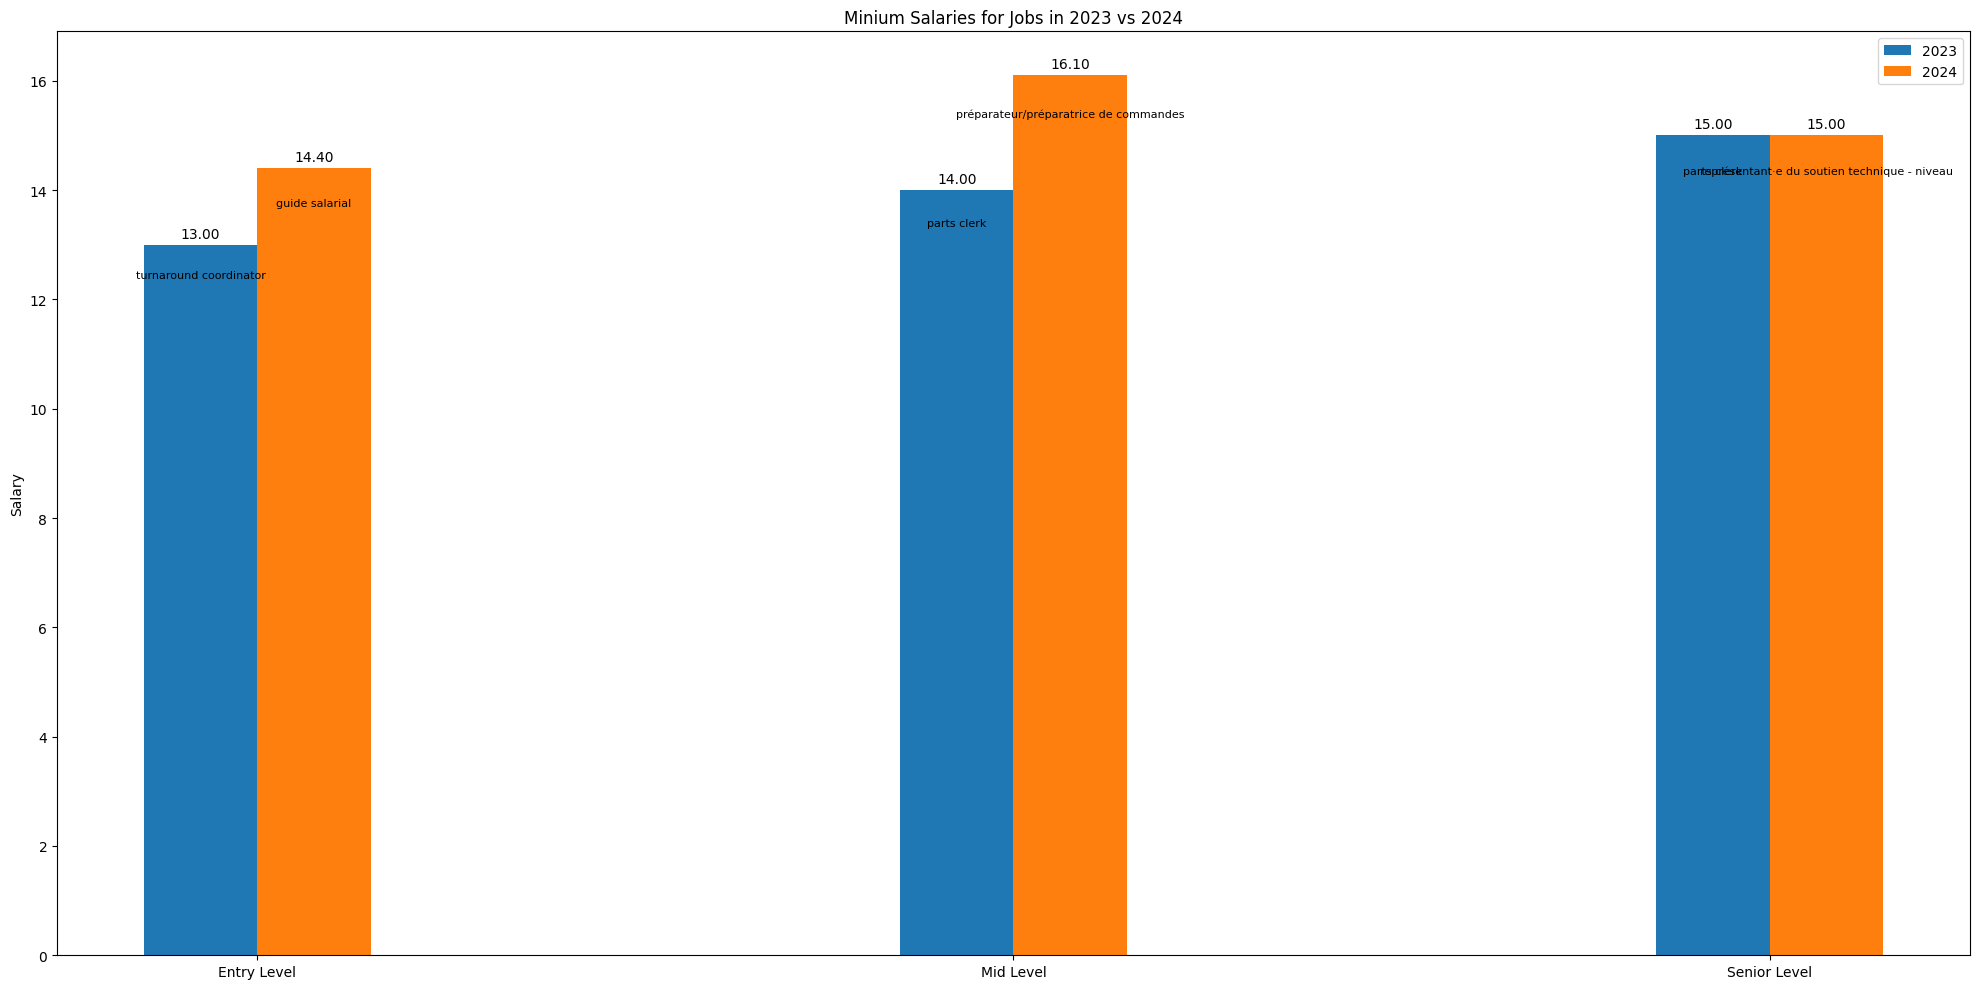

In [32]:
# Set up the bar positions
barWidth = 0.15
r1 = np.arange(len(['Entry Level', 'Mid Level', 'Senior Level']))
r2 = [x + barWidth for x in r1]

# Plotting the data
fig, ax = plt.subplots(figsize=(20, 10))

# Bars for 2023
bars1 = ax.bar(r1, min_2023, width=barWidth, label='2023')

# Bars for 2024
bars2 = ax.bar(r2, min_2024, width=barWidth, label='2024')

# add labels
add_labels(bars1, ax)
add_labels(bars2, ax)

# Add job names
add_job_names(bars1, ax, [min_entry_job_2023, min_mid_job_2023, min_senior_job_2023])
add_job_names(bars2, ax, [min_entry_job_2024, min_mid_job_2024, min_senior_job_2024])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Salary')
ax.set_title('Minium Salaries for Jobs in 2023 vs 2024')
ax.set_xticks([r + barWidth / 2 for r in range(len(['Entry Level', 'Mid Level', 'Senior Level']))])
ax.set_xticklabels(['Entry Level', 'Mid Level', 'Senior Level'])
ax.legend()

plt.tight_layout()
plt.show()

# Max

In [15]:
# Find the job names for max salaries
max_entry_job_2023 = df_sorted_2023.loc[df_sorted_2023['entry_max'].idxmax()]['job']
max_mid_job_2023 = df_sorted_2023.loc[df_sorted_2023['mid_max'].idxmax()]['job']
max_senior_job_2023 = df_sorted_2023.loc[df_sorted_2023['senior_max'].idxmax()]['job']

max_entry_job_2024 = df_sorted_2024.loc[df_sorted_2024['entry_max'].idxmax()]['job']
max_mid_job_2024 = df_sorted_2024.loc[df_sorted_2024['mid_max'].idxmax()]['job']
max_senior_job_2024 = df_sorted_2024.loc[df_sorted_2024['senior_max'].idxmax()]['job']

# Max salary values for 2023 and 2024
max_2023 = [df_sorted_2023[df_sorted_2023['entry_max'] > 0]['entry_max'].max(), df_sorted_2023['mid_min'].max(), df_sorted_2023['senior_max'].max()]
max_2024 = [df_sorted_2024['entry_max'].max(), df_sorted_2024['mid_max'].max(), df_sorted_2023[df_sorted_2023['senior_max'] > 0]['senior_max'].max()]

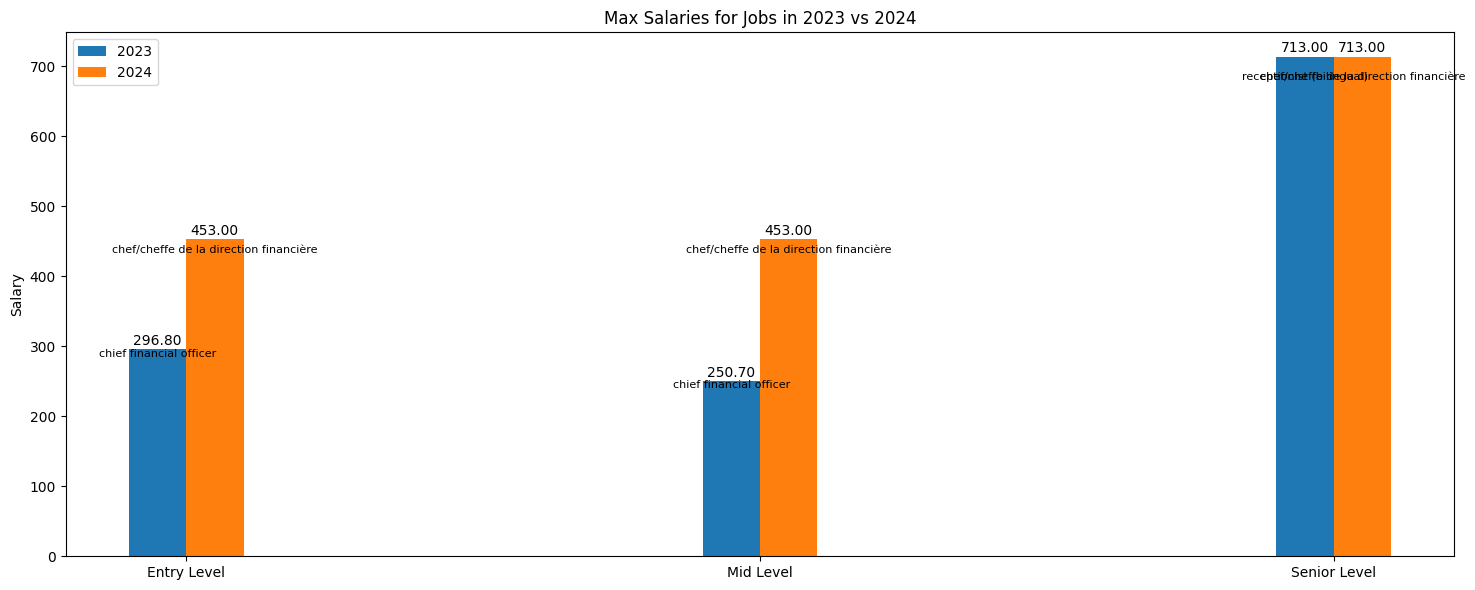

In [33]:
# Set up the bar positions
barWidth = 0.1
r1 = np.arange(len(['Entry Level', 'Mid Level', 'Senior Level']))
r2 = [x + barWidth for x in r1]


# Plotting the data
fig, ax = plt.subplots(figsize=(15, 6))  # Wider chart

# Bars for 2023
bars1 = ax.bar(r1, max_2023, width=barWidth, label='2023')

# Bars for 2024
bars2 = ax.bar(r2, max_2024, width=barWidth, label='2024')

# Add labels to the bars
add_labels(bars1, ax)
add_labels(bars2, ax)

add_job_names(bars1, ax, [max_entry_job_2023, max_mid_job_2023, max_senior_job_2023])
add_job_names(bars2, ax, [max_entry_job_2024, max_mid_job_2024, max_senior_job_2024])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Salary')
ax.set_title('Max Salaries for Jobs in 2023 vs 2024')
ax.set_xticks([r + barWidth / 2 for r in range(len(['Entry Level', 'Mid Level', 'Senior Level']))])
ax.set_xticklabels(['Entry Level', 'Mid Level', 'Senior Level'])
ax.legend()

plt.tight_layout()
plt.show()

# Mean

In [37]:
# Calculate standard deviation for mean salaries
std_mean_2023 = [df_sorted_2023['entry_mean'].std(), df_sorted_2023['mid_mean'].std(), df_sorted_2023['senior_mean'].std()]
std_mean_2024 = [df_sorted_2024['entry_mean'].std(), df_sorted_2024['mid_mean'].std(), df_sorted_2024['senior_mean'].std()]

# Find the job names closest to the mean salaries
mean_entry_job_2023 = df_sorted_2023.loc[(df_sorted_2023['entry_mean'] - df_sorted_2023['entry_mean'].mean()).abs().idxmin()]['job']
mean_mid_job_2023 = df_sorted_2023.loc[(df_sorted_2023['mid_mean'] - df_sorted_2023['mid_mean'].mean()).abs().idxmin()]['job']
mean_senior_job_2023 = df_sorted_2023.loc[(df_sorted_2023['senior_mean'] - df_sorted_2023['senior_mean'].mean()).abs().idxmin()]['job']

mean_entry_job_2024 = df_sorted_2024.loc[(df_sorted_2024['entry_mean'] - df_sorted_2024['entry_mean'].mean()).abs().idxmin()]['job']
mean_mid_job_2024 = df_sorted_2024.loc[(df_sorted_2024['mid_mean'] - df_sorted_2024['mid_mean'].mean()).abs().idxmin()]['job']
mean_senior_job_2024 = df_sorted_2024.loc[(df_sorted_2024['senior_mean'] - df_sorted_2024['senior_mean'].mean()).abs().idxmin()]['job']

# Mean salary values for 2023 and 2024
mean_2023 = [df_sorted_2023['entry_mean'].mean(), df_sorted_2023['mid_mean'].mean(), df_sorted_2023['senior_mean'].mean()]
mean_2024 = [df_sorted_2024['entry_mean'].mean(), df_sorted_2024['mid_mean'].mean(), df_sorted_2024['senior_mean'].mean()]


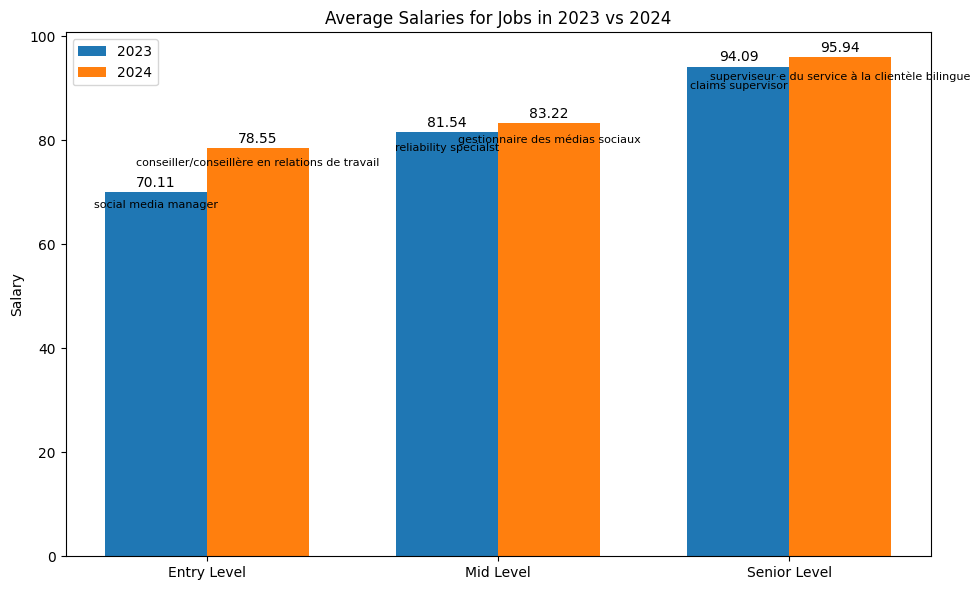

In [38]:
# Set up the bar positions
barWidth = 0.35
r1 = np.arange(len(['Entry Level', 'Mid Level', 'Senior Level']))
r2 = [x + barWidth for x in r1]

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Bars for 2023
bars1 = ax.bar(r1, mean_2023, width=barWidth, label='2023')

# Bars for 2024
bars2 = ax.bar(r2, mean_2024, width=barWidth, label='2024')

# Add labels to the bars
add_labels(bars1, ax)
add_labels(bars2, ax)

add_job_names(bars1, ax, [mean_entry_job_2023, mean_mid_job_2023, mean_senior_job_2023])
add_job_names(bars2, ax, [mean_entry_job_2024, mean_mid_job_2024, mean_senior_job_2024])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Salary')
ax.set_title('Average Salaries for Jobs in 2023 vs 2024')
ax.set_xticks([r + barWidth / 2 for r in range(len(['Entry Level', 'Mid Level', 'Senior Level']))])
ax.set_xticklabels(['Entry Level', 'Mid Level', 'Senior Level'])
ax.legend()

plt.tight_layout()
plt.show()


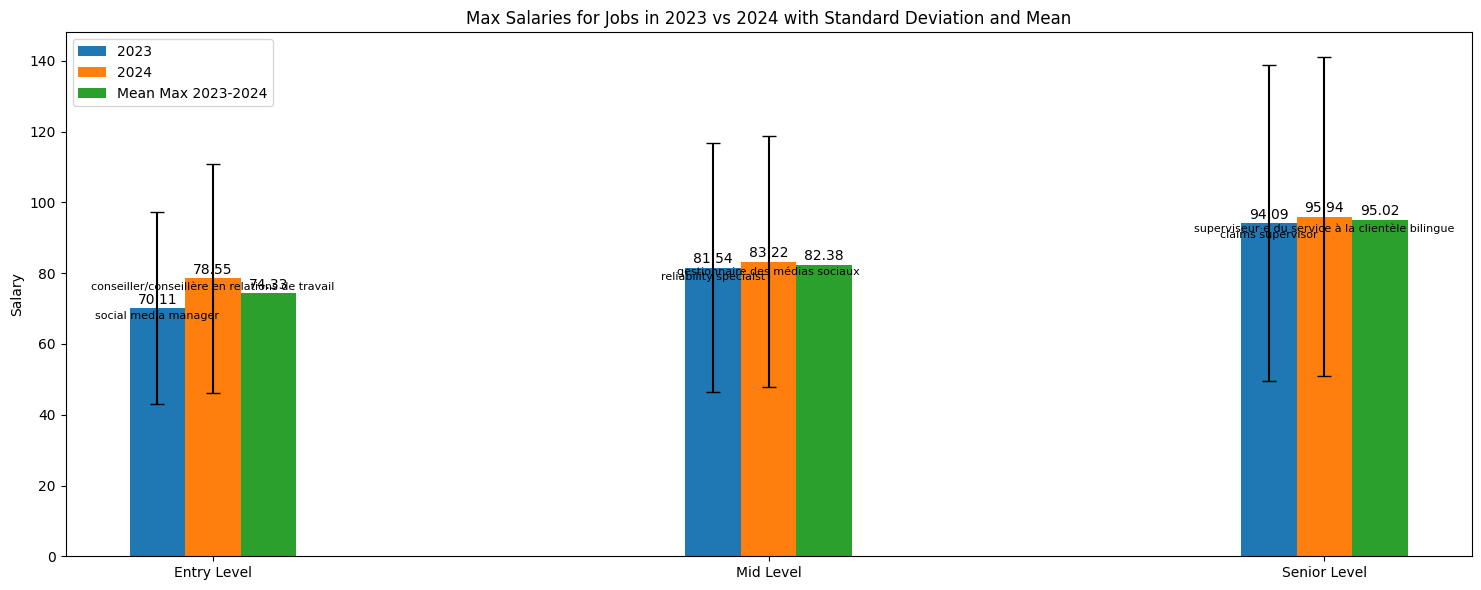

In [41]:
# Calculate mean of max salaries between 2023 and 2024
mean_max = [(a + b) / 2 for a, b in zip(mean_2023, mean_2024)]

# Bar positions
barWidth = 0.1
r1 = np.arange(len(['Entry Level', 'Mid Level', 'Senior Level']))
r2 = [x + barWidth for x in r1]
r3 = [x + 2 * barWidth for x in r1]  # Position for mean max bars

# Plotting the data
fig, ax = plt.subplots(figsize=(15, 6))

# Bars for 2023 with std deviation bars
bars1 = ax.bar(r1, mean_2023, yerr=std_mean_2023, capsize=5, width=barWidth, label='2023')

# Bars for 2024 with std deviation bars
bars2 = ax.bar(r2, mean_2024, yerr=std_mean_2024, capsize=5, width=barWidth, label='2024')

# Bars for mean max between 2023 and 2024
bars3 = ax.bar(r3, mean_max, width=barWidth, label='Mean Max 2023-2024')

# Add labels to the bars
add_labels(bars1, ax)
add_labels(bars2, ax)
add_labels(bars3, ax)

# add job names
add_job_names(bars1, ax, [mean_entry_job_2023, mean_mid_job_2023, mean_senior_job_2023])
add_job_names(bars2, ax, [mean_entry_job_2024, mean_mid_job_2024, mean_senior_job_2024])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Salary')
ax.set_title('Max Salaries for Jobs in 2023 vs 2024 with Standard Deviation and Mean')
ax.set_xticks([r + barWidth for r in range(len(['Entry Level', 'Mid Level', 'Senior Level']))])
ax.set_xticklabels(['Entry Level', 'Mid Level', 'Senior Level'])
ax.legend()

plt.tight_layout()
plt.show()


In [47]:
percentile_75_2023 = df_sorted_2023[['entry_mean', 'mid_mean', 'senior_mean']].quantile(0.75).tolist()
percentile_75_2024 = df_sorted_2024[['entry_mean', 'mid_mean', 'senior_mean']].quantile(0.75).tolist()

percentile_85_2023 = df_sorted_2023[['entry_mean', 'mid_mean', 'senior_mean']].quantile(0.85).tolist()
percentile_85_2024 = df_sorted_2024[['entry_mean', 'mid_mean', 'senior_mean']].quantile(0.85).tolist()

percentile_99_2023 = df_sorted_2023[['entry_mean', 'mid_mean', 'senior_mean']].quantile(0.99).tolist()
percentile_99_2024 = df_sorted_2024[['entry_mean', 'mid_mean', 'senior_mean']].quantile(0.99).tolist()


#job names for 75th percentile
percentile_75_job_2023 = df_sorted_2023.loc[(df_sorted_2023['entry_mean'] - percentile_75_2023[0]).abs().idxmin()]['job']
percentile_75_job_2024 = df_sorted_2024.loc[(df_sorted_2024['entry_mean'] - percentile_75_2024[0]).abs().idxmin()]['job']

#job names for 85th percentile
percentile_85_job_2023 = df_sorted_2023.loc[(df_sorted_2023['entry_mean'] - percentile_85_2023[0]).abs().idxmin()]['job']
percentile_85_job_2024 = df_sorted_2024.loc[(df_sorted_2024['entry_mean'] - percentile_85_2024[0]).abs().idxmin()]['job']

#job names for 99th percentile
percentile_99_job_2023 = df_sorted_2023.loc[(df_sorted_2023['entry_mean'] - percentile_99_2023[0]).abs().idxmin()]['job']
percentile_99_job_2024 = df_sorted_2024.loc[(df_sorted_2024['entry_mean'] - percentile_99_2024[0]).abs().idxmin()]['job']

SyntaxError: keyword argument repeated: color (3200138107.py, line 61)

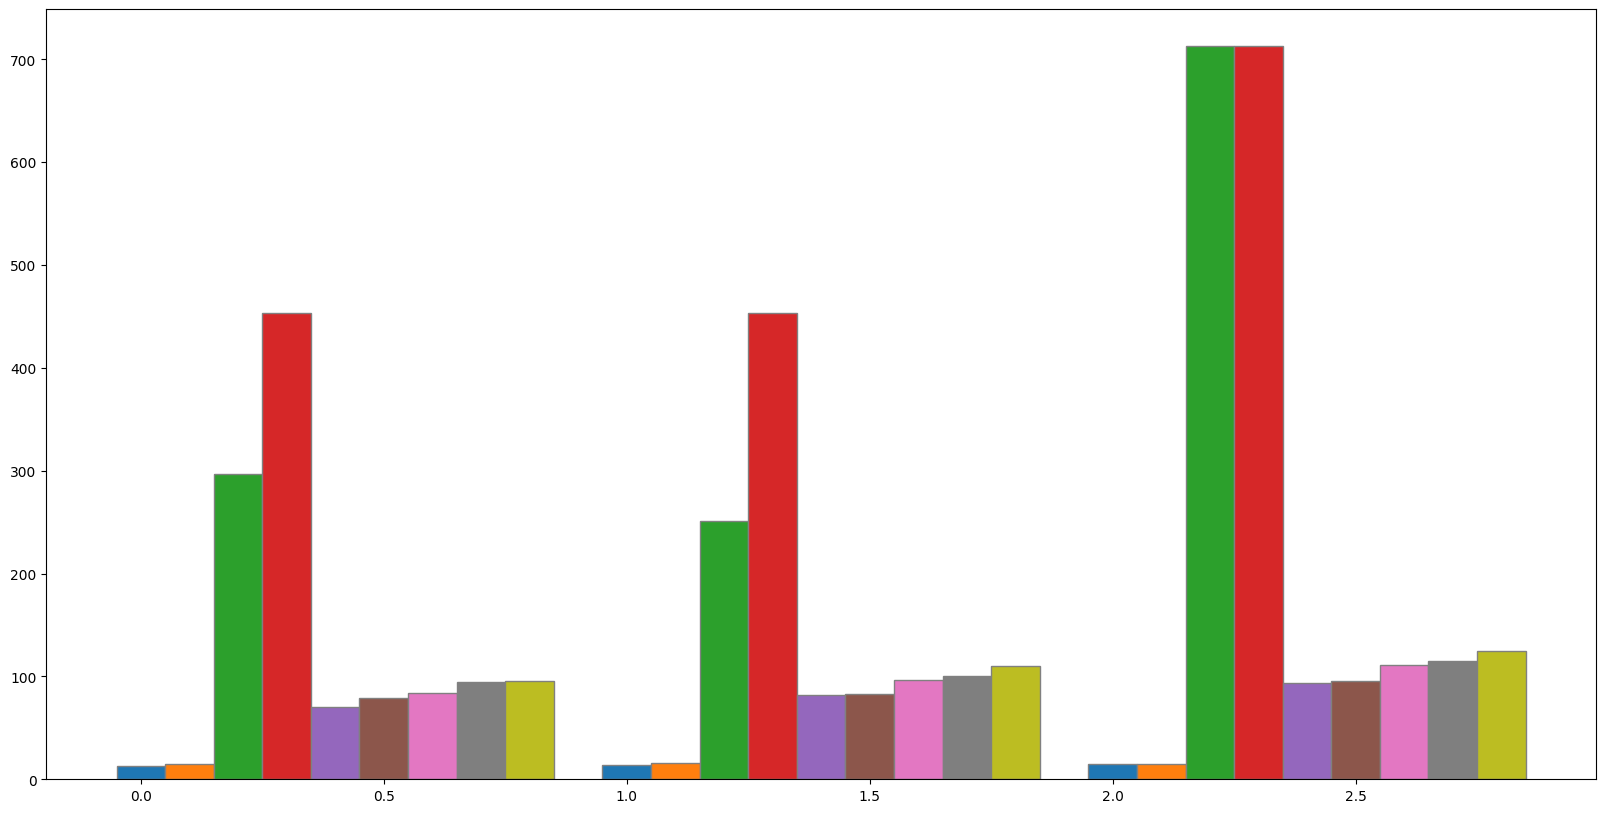

In [50]:
# Setting up the bar positions and width
barWidth = 0.1
r_base = np.arange(len(["Entry Level", "Mid Level", "Senior Level"]))
r1 = list(r_base)
r2 = [x + barWidth for x in r1]
r3 = [x + 2 * barWidth for x in r1]
r4 = [x + 3 * barWidth for x in r1]
r5 = [x + 4 * barWidth for x in r1]
r6 = [x + 5 * barWidth for x in r1]
r7 = [x + 6 * barWidth for x in r1]
r8 = [x + 7 * barWidth for x in r1]
r9 = [x + 8 * barWidth for x in r1]
r10 = [x + 9 * barWidth for x in r1]
r11 = [x + 10 * barWidth for x in r1]
r12 = [x + 11 * barWidth for x in r1]

fig, ax = plt.subplots(figsize=(20, 10))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#000000']

# Plotting the data
ax.bar(r1, min_2023, width=barWidth, color=colors[0], edgecolor="grey", label="Min 2023")
ax.bar(r2, min_2024, width=barWidth, color=colors[1], edgecolor="grey", label="Min 2024")

ax.bar(r3, max_2023, width=barWidth, color=colors[2], edgecolor="grey", label="Max 2023")
ax.bar(r4, max_2024, width=barWidth, color=colors[3], edgecolor="grey", label="Max 2024")

ax.bar(r5, mean_2023, width=barWidth, color=colors[4], edgecolor="grey", label="Mean 2023")
ax.bar(r6, mean_2024, width=barWidth, color=colors[5], edgecolor="grey", label="Mean 2024")

ax.bar(
    r7,
    percentile_75_2023,
    width=barWidth,
    color=colors[6],
    edgecolor="grey",
    label="75th Pct 2023",
)
ax.bar(
    r8,
    percentile_75_2024,
    width=barWidth,
    color=colors[7],
    edgecolor="grey",
    label="75th Pct 2024",
)

ax.bar(
    r9,
    percentile_85_2023,
    width=barWidth,
    color=colors[8],
    edgecolor="grey",
    label="85th Pct 2023",
)

ax.bar(
    r10,
    percentile_85_2024,
    width=barWidth,
    color="pink",
    color=colors[9],
    label="85th Pct 2024",
)

ax.bar(
    r11,
    percentile_99_2023,
    width=barWidth,
    color="",
    color=colors[10],
    label="99th Pct 2023",
)

# Function to add labels
def add_labels(bars, ax):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2., 1.005 * height, '%.2f' % float(height), ha='center', va='bottom', fontsize=10, color='black')

# Function to add job names
def add_job_names(bars, ax, job_names):
    for bar, job_name in zip(bars, job_names):
        ax.text(bar.get_x() + bar.get_width() / 2., 1.01 * bar.get_height(), job_name, ha='center', va='bottom', rotation=0, fontsize=8, color='black')




add_labels(ax.patches, ax)

# Add job names
add_job_names(
    ax.patches,
    ax,
    [
        min_entry_job_2023,
        min_mid_job_2023,
        min_senior_job_2023,
        min_entry_job_2024,
        min_mid_job_2024,
        min_senior_job_2024,
        max_entry_job_2023,
        max_mid_job_2023,
        max_senior_job_2023,
        max_entry_job_2024,
        max_mid_job_2024,
        max_senior_job_2024,
        mean_entry_job_2023,
        mean_mid_job_2023,
        mean_senior_job_2023,
        mean_entry_job_2024,
        mean_mid_job_2024,
        mean_senior_job_2024,
        percentile_75_job_2023,
        percentile_75_job_2024,
        percentile_85_job_2023,
        percentile_85_job_2024,
        percentile_99_job_2023,
        percentile_99_job_2024,
    ],
)

# Adding text for labels, title, and custom x-axis tick labels
ax.set_xlabel("Job Levels", fontweight="bold")
ax.set_ylabel("Salary")
ax.set_title("Salary Comparison for Jobs in 2023 vs 2024")
ax.set_xticks(
    [
        r + 2.5 * barWidth
        for r in range(len(["Entry Level", "Mid Level", "Senior Level"]))
    ]
)
ax.set_xticklabels(["Entry Level", "Mid Level", "Senior Level"])
ax.legend()

plt.tight_layout()
plt.show()

/tmp/ipykernel_1165963/3585144456.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


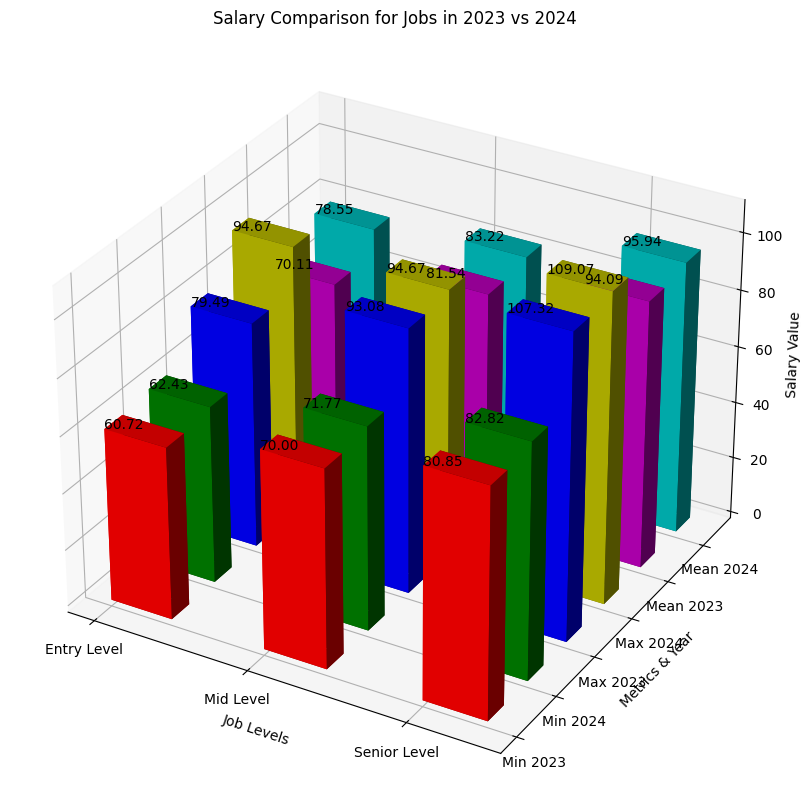

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Define the labels
labels = ['Entry Level', 'Mid Level', 'Senior Level']

# Data preparation
min_values_2023 = [df_sorted_2023['entry_min'].mean(), df_sorted_2023['mid_min'].mean(), df_sorted_2023['senior_min'].mean()]
min_values_2024 = [df_sorted_2024['entry_min'].mean(), df_sorted_2024['mid_min'].mean(), df_sorted_2024['senior_min'].mean()]

max_values_2023 = [df_sorted_2023['entry_max'].mean(), df_sorted_2023['mid_max'].mean(), df_sorted_2023['senior_max'].mean()]
max_values_2024 = [df_sorted_2024['entry_max'].mean(), df_sorted_2024['mid_max'].mean(), df_sorted_2024['senior_max'].mean()]

mean_values_2023 = [df_sorted_2023['entry_mean'].mean(), df_sorted_2023['mid_mean'].mean(), df_sorted_2023['senior_mean'].mean()]
mean_values_2024 = [df_sorted_2024['entry_mean'].mean(), df_sorted_2024['mid_mean'].mean(), df_sorted_2024['senior_mean'].mean()]

all_values = min_values_2023 + min_values_2024 + max_values_2023 + max_values_2024 + mean_values_2023 + mean_values_2024

# Create a meshgrid for plotting
_x = np.arange(len(labels))
_y = np.arange(6)  # 2 years * 3 metrics (min, max, mean)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

# Initialize z and height
z = np.zeros_like(x)
height = all_values

# Create the 3D plot
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# Bar width and depth
width = depth = 0.4

# Plot bars
colors = ['r']*3 + ['g']*3 + ['b']*3 + ['y']*3 + ['m']*3 + ['c']*3
ax.bar3d(x, y, z, width, depth, height, shade=True, color=colors)

# Add text labels
for xi, yi, zi, hi in zip(x, y, z, height):
    ax.text(xi, yi, zi + hi, f"{hi:.2f}")

# Add labels, title, and legend
ax.set_xticks(_x)
ax.set_xticklabels(labels)
ax.set_yticks(_y)
ax.set_yticklabels(['Min 2023', 'Min 2024', 'Max 2023', 'Max 2024', 'Mean 2023', 'Mean 2024'])
ax.set_title('Salary Comparison for Jobs in 2023 vs 2024')
ax.set_xlabel('Job Levels')
ax.set_ylabel('Metrics & Year')
ax.set_zlabel('Salary Value')

plt.tight_layout()
plt.show()
